In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  # pandas aware plotting library
import xarray as xr
from   datetime import datetime, date, timedelta
import scipy 

# Description and Data Sources

In [2]:
### To Do List:

# - PV Stability 
# - Add 50 mb Heights, Atlantic/Pacific SSTs
# - Add climate thresholds (1980s, 1990s, 2000s, etc.. to test for the stability of the relationship)
# - Add Drought
# - Add QBO, IO SSTs
# - Add more regions
# - Add scatter diagrams to highlight non-linear
# - Add p-values 

### Done: 

### Data:
# Atlantic SSTs: http://www.esrl.noaa.gov/psd/data/correlation/amon.us.data
# Snow:          http://climate.rutgers.edu/snowcover/table_area.php?ui_set=1&ui_sort=0    
# ENSO: http://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ensoyears.shtml
# QBO: http://www.cpc.ncep.noaa.gov/data/indices/qbo.u30.index
# Strat : http://www.esrl.noaa.gov/psd/cgi-bin/data/timeseries/timeseries1.pl  (between 60 and 90)
# AO: ftp://ftp.cpc.ncep.noaa.gov/cwlinks/
#

# Load Data

In [3]:
def Indices():
   
    data=[]
    colnames = ['Date', 'Year', 'Month', 'Day', 'Value']
    Index='AO'
    data = pd.read_csv('/Users/davidmargolin/Desktop/Python/Data/' + Index + '.csv', names=colnames) 
    data['Value'] = data['Value'].apply(pd.to_numeric, errors='coerce')
    data=data.interpolate()

    return Index, data

In [4]:
def Snow():

    colnames = ['Year', 'Month', 'Value']
    Index_NASnow='moncov.namgnld' # NA Snow
    Index_EuSnow='moncov.eurasia' # Eurasia Snow
    
    
    df_NASnow = pd.read_csv('/Users/davidmargolin/Desktop/Python/Data/Indices/' + Index_NASnow + '.txt', 
                            sep='\s+', names=colnames) # sep='\s+\' is for white space delineator
    df_NASnow['Value'] = df_NASnow['Value'].apply(pd.to_numeric, errors='coerce')
    df_NASnow=df_NASnow.interpolate()
    
        
    df_EuSnow = pd.read_csv('/Users/davidmargolin/Desktop/Python/Data/Indices/' + Index_EuSnow + '.txt', 
                            sep='\s+', names=colnames) # sep='\s+\' is for white space delineator
    df_EuSnow['Value'] = df_EuSnow['Value'].apply(pd.to_numeric, errors='coerce')
    df_EuSnow=df_EuSnow.interpolate()

    return df_NASnow, df_EuSnow

In [5]:
def HDDs():

    colnames = ['Year', 'Month', 'Value']
    Index='HDDs' # Eurasia Snow
    df_HDDs = pd.read_csv('/Users/davidmargolin/Desktop/Python/Data/' + Index + '.csv', names=colnames) 
    df_HDDs['Value'] = df_HDDs['Value'].apply(pd.to_numeric, errors='coerce')
    df_HDDs=df_HDDs.interpolate()

    return df_HDDs

In [6]:
#### Call Functions to convert from monthly to daily... and filter dataframes by year and month

Index,      data=                   Indices()
df_NASnow, df_EuSnow =  Snow()
df_HDDs                          =  HDDs()

### Variables
year_start=1980
year_end=  2019 #  '2019' equates to the 2017-2018 ONDJFM Period

year_count=np.arange(year_start,year_end)
month_count=np.arange(1,13)

Data_Values=[]
Data_Years=[]
Data_Months=[]
NASnow=[]
EuSnow=[]
HDDs=[]

### Convert from daily to monthly and filter by year and month
for year in year_count:
    for month in month_count:
        Data_Values.append(data[(data.Month==month)  & (data.Year == year)].Value.mean())
        Data_Years.append(data[(data.Month==month)  & (data.Year == year)].Year.mean())
        Data_Months.append(data[(data.Month==month)  & (data.Year == year)].Month.mean())
        NASnow.append(df_NASnow[(df_NASnow.Month==month)   & (df_NASnow.Year == year)].Value.mean())
        EuSnow.append(df_EuSnow[(df_EuSnow.Month==month)   & (df_EuSnow.Year == year)].Value.mean())
        HDDs.append(df_HDDs[(df_HDDs.Month==month)     & (df_HDDs.Year   == year)].Value.mean())
        

In [46]:
df_Indices = pd.DataFrame(index=range(0,len(Data_Values)), columns=['Year'])

df_Indices['Year']     =Data_Years
df_Indices['Month']    =Data_Months
df_Indices['HDDs']     =HDDs
df_Indices['AO']       =Data_Values 
df_Indices['NASnow']   =NASnow
df_Indices['EuSnow']   =EuSnow

# Remove empty data values
df_Indices=df_Indices.drop([(len(df_Indices)-1),(len(df_Indices)-2), len(df_Indices)-3])

# Individual Matrices

In [8]:
### Matrix - All Months
df_Matrix_HDDs =      pd.DataFrame(index=range(0,len(year_count)), columns=['1'])
df_Matrix_AO =        pd.DataFrame(index=range(0,len(year_count)), columns=['1'])
df_Matrix_NASnow   =  pd.DataFrame(index=range(0,len(year_count)), columns=['1'])
df_Matrix_EuSnow   =  pd.DataFrame(index=range(0,len(year_count)), columns=['1'])

for row in month_count:
    if len(df_Indices['AO'][(df_Indices.Month==row)].values)==len(df_Indices['AO'][(df_Indices.Month==1)].values):
        df_Matrix_HDDs[str(row)]     = df_Indices['HDDs'][(df_Indices.Month==row)].values
        df_Matrix_AO[str(row)]       = df_Indices['AO'][(df_Indices.Month==row)].values
        df_Matrix_NASnow[str(row)]   = df_Indices['NASnow'][(df_Indices.Month==row)].values
        df_Matrix_EuSnow[str(row)]   = df_Indices['EuSnow'][(df_Indices.Month==row)].values
    else:
        temp=df_Indices['AO'][(df_Indices.Month==row)].values
        temp=np.append([temp],[0])
        df_Matrix_AO[str(row)]=temp 

        temp=df_Indices['NASnow'][(df_Indices.Month==row)].values
        temp=np.append([temp],[0])
        df_Matrix_NASnow[str(row)]=temp 
    
        temp=df_Indices['EuSnow'][(df_Indices.Month==row)].values
        temp=np.append([temp],[0])
        df_Matrix_EuSnow[str(row)]=temp 
    
        temp=df_Indices['HDDs'][(df_Indices.Month==row)].values
        temp=np.append([temp],[0])
        df_Matrix_HDDs[str(row)]=temp 
        
df_Matrix_AO=df_Matrix_AO.round(2) 
df_Matrix_NASnow=df_Matrix_NASnow.round(2) 
df_Matrix_EuSnow=df_Matrix_EuSnow.round(2) 
df_Matrix_HDDs=df_Matrix_HDDs.round(2) 

df_Matrix_AO=df_Matrix_AO.drop([(len(df_Matrix_AO)-1)])
df_Matrix_NASnow=df_Matrix_NASnow.drop([(len(df_Matrix_NASnow)-1)])
df_Matrix_EuSnow=df_Matrix_EuSnow.drop([(len(df_Matrix_EuSnow)-1)])
df_Matrix_HDDs=df_Matrix_HDDs.drop([(len(df_Matrix_HDDs)-1)])

In [9]:
### Matrix - Winter only
df_Matrix_HDDs_Winter =      pd.DataFrame(index=range(0,len(year_count)), columns=['10'])
df_Matrix_AO_Winter =        pd.DataFrame(index=range(0,len(year_count)), columns=['10'])
df_Matrix_NASnow_Winter =    pd.DataFrame(index=range(0,len(year_count)), columns=['10'])
df_Matrix_EuSnow_Winter =    pd.DataFrame(index=range(0,len(year_count)), columns=['10'])

month_count_winter=np.array([10,11,12,1,2,3])
for row in month_count_winter:
    if row > 9:
        df_Matrix_HDDs_Winter[str(row)]     =  df_Matrix_HDDs[str(row)]
        df_Matrix_AO_Winter[str(row)]       =  df_Matrix_AO[str(row)]
        df_Matrix_NASnow_Winter[str(row)]   =  df_Matrix_NASnow[str(row)]
        df_Matrix_EuSnow_Winter[str(row)]   =  df_Matrix_EuSnow[str(row)]
    else:
        temp=df_Indices['AO'][(df_Indices.Month==row)].values
        temp=np.append(temp,0)
        df_Matrix_AO_Winter[str(row)]=temp[1:]
        
        temp=df_Indices['NASnow'][(df_Indices.Month==row)].values
        temp=np.append(temp,0)
        df_Matrix_NASnow_Winter[str(row)]=temp[1:]
        
        temp=df_Indices['EuSnow'][(df_Indices.Month==row)].values
        temp=np.append(temp,0)
        df_Matrix_EuSnow_Winter[str(row)]=temp[1:]
        
        temp=df_Indices['HDDs'][(df_Indices.Month==row)].values
        temp=np.append(temp,0)
        df_Matrix_HDDs_Winter[str(row)]=temp[1:]
    
df_Matrix_AO_Winter=df_Matrix_AO_Winter.round(2)
df_Matrix_AO_Winter=df_Matrix_AO_Winter.drop([(len(df_Matrix_AO_Winter)-1)])
    
df_Matrix_NASnow_Winter=df_Matrix_NASnow_Winter.round(2)
df_Matrix_NASnow_Winter=df_Matrix_NASnow_Winter.drop([(len(df_Matrix_NASnow_Winter)-1)])

df_Matrix_EuSnow_Winter=df_Matrix_EuSnow_Winter.round(2)
df_Matrix_EuSnow_Winter=df_Matrix_EuSnow_Winter.drop([(len(df_Matrix_EuSnow_Winter)-1)])

df_Matrix_HDDs_Winter=df_Matrix_HDDs_Winter.round(2)
df_Matrix_HDDs_Winter=df_Matrix_HDDs_Winter.drop([(len(df_Matrix_HDDs_Winter)-1)])

# All Matrices

In [62]:
# All - Matrix

#df_Matrix_All = pd.DataFrame(index=range(0,len(year_count)), columns=['1a'])
df_Matrix_All = pd.DataFrame(index=range(0,len(year_count)), columns=['1: AO'])

for row in month_count:
    if len(df_Indices['AO'][(df_Indices.Month==row)].values)==len(df_Indices['AO'][(df_Indices.Month==1)].values):
        df_Matrix_All[str(row) + ': AO']   = df_Indices['AO'][(df_Indices.Month==row)].values
    else:
        temp=df_Indices['AO'][(df_Indices.Month==row)].values
        temp=np.append([temp],[0])
        df_Matrix_All[str(row) + ': AO']=temp 
        
# ---------

    if len(df_Indices['EuSnow'][(df_Indices.Month==row)].values)==len(df_Indices['EuSnow'][(df_Indices.Month==1)].values):
        df_Matrix_All[str(row) + ': EuSnow']   = df_Indices['EuSnow'][(df_Indices.Month==row)].values

    else:
        temp=df_Indices['EuSnow'][(df_Indices.Month==row)].values
        temp=np.append([temp],[0])
        df_Matrix_All[str(row) + ': EuSnow']=temp 
        
# ---------    

    if len(df_Indices['NASnow'][(df_Indices.Month==row)].values)==len(df_Indices['NASnow'][(df_Indices.Month==1)].values):
        df_Matrix_All[str(row) + ': NASnow']   = df_Indices['NASnow'][(df_Indices.Month==row)].values

    else:
        temp=df_Indices['NASnow'][(df_Indices.Month==row)].values
        temp=np.append([temp],[0])
        df_Matrix_All[str(row) + ': NASnow']=temp 
    
# ---------

    if len(df_Indices['HDDs'][(df_Indices.Month==row)].values)==len(df_Indices['HDDs'][(df_Indices.Month==1)].values):
        df_Matrix_All[str(row) + ': HDDs']   = df_Indices['HDDs'][(df_Indices.Month==row)].values

    else:
        temp=df_Indices['HDDs'][(df_Indices.Month==row)].values
        temp=np.append([temp],[0])
        df_Matrix_All[str(row) + ': HDDs']=temp 
    
df_Matrix_All=df_Matrix_All.round(2)
df_Matrix_All=df_Matrix_All.drop([(len(df_Matrix_All)-1)])

In [64]:
# All - Matrix (Winter only)

df_Matrix_All_Winter = pd.DataFrame(index=range(0,len(year_count)), columns=['10: AO'])

month_count_winter=np.array([10,11,12,1,2,3])
for row in month_count_winter:
    if row > 9:
        df_Matrix_All_Winter[str(row) + ': AO']  =  df_Matrix_All[str(row) + ': AO']
    else:
        temp=df_Indices['AO'][(df_Indices.Month==row)].values
        temp=np.append(temp,0)
        df_Matrix_All_Winter[str(row) + ': AO']=temp[1:]

    if row > 9:
        df_Matrix_All_Winter[str(row) + ': EuSnow']  =  df_Matrix_All[str(row) + ': EuSnow']
    else:
        temp=df_Indices['EuSnow'][(df_Indices.Month==row)].values
        temp=np.append(temp,0)
        df_Matrix_All_Winter[str(row) + ': EuSnow']=temp[1:]
        
    if row > 9:
        df_Matrix_All_Winter[str(row) + ': NASnow']  =  df_Matrix_All[str(row) + ': NASnow']
    else:
        temp=df_Indices['NASnow'][(df_Indices.Month==row)].values
        temp=np.append(temp,0)
        df_Matrix_All_Winter[str(row) + ': NASnow']=temp[1:]
        
    if row > 9:
        df_Matrix_All_Winter[str(row) + ': HDDs']  =  df_Matrix_All[str(row) + ': HDDs']
    else:
        temp=df_Indices['HDDs'][(df_Indices.Month==row)].values
        temp=np.append(temp,0)
        df_Matrix_All_Winter[str(row) + ': HDDs']=temp[1:]
    
    
df_Matrix_All_Winter=df_Matrix_All_Winter.round(2)
df_Matrix_All_Winter=df_Matrix_All_Winter.drop([(len(df_Matrix_All_Winter)-1)])

# Correlation and p-value

In [12]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr
# Pearsonr returns: Pearson’s correlation coefficient, 2-tailed p-value)

#Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.
#The Pearson correlation coefficient measures the linear relationship between two datasets. 
#Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. 
#Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. 
#Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, 
#so does y. Negative correlations imply that as x increases, y decreases.

#The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a 
#Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not 
#entirely reliable but are probably reasonable for datasets larger than 500 or so.

#scipy.stats.pearsonr(Data_Values, Data_Values)
#scipy.stats.pearsonr(df_Indices['Values'][(df_Indices.Month==11, df_Indices.Month==11)])

stats_hold=scipy.stats.pearsonr(df_Indices['AO'][(df_Indices.Month==11)],df_Indices['AO'][(df_Indices.Month==12)])
stats_corr='{:5.2f}'. format(float(stats_hold[0]))
stats_pvalue='{:5.2f}'. format(float(stats_hold[1]))
print(stats_corr)
print(stats_pvalue)

 0.39
 0.02


# Heat Maps

Text(0.5,1,'HDDs Heat Map')

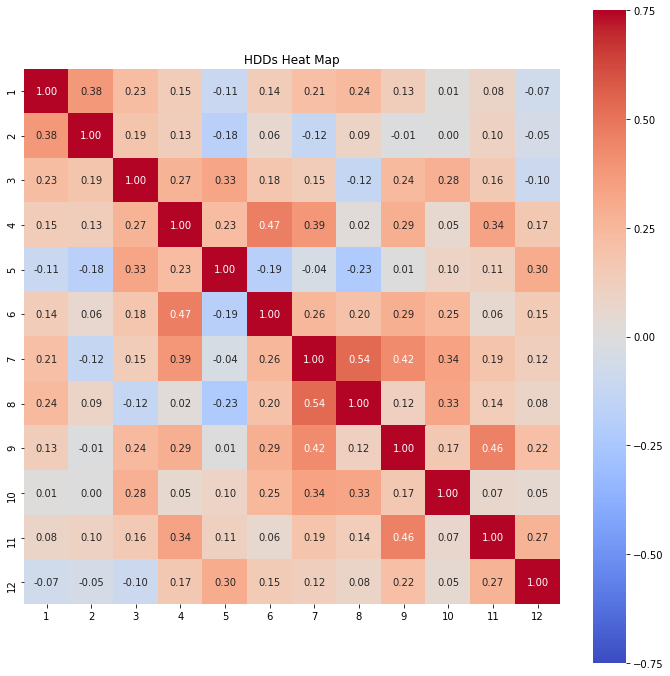

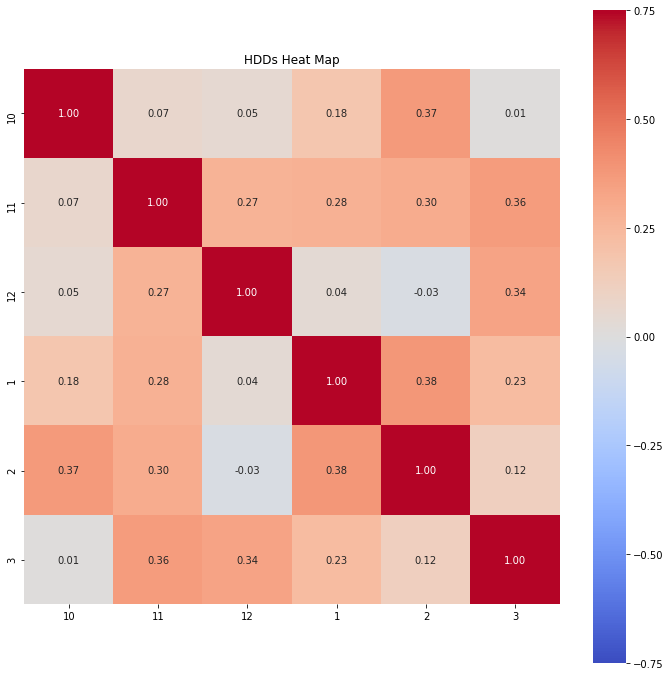

In [50]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_Matrix_HDDs.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax, annot=True)


midpoint =0
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm",annot=True, 
            center=midpoint, vmin=-.75, vmax=.75,fmt=".2f",square=True) 

plt.title('HDDs Heat Map')

#######################

f, ax = plt.subplots(figsize=(12, 12))
corr = df_Matrix_HDDs_Winter.corr()

midpoint =0
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm",annot=True, 
            center=midpoint, vmin=-.75, vmax=.75,fmt=".2f",square=True) 

plt.title('HDDs Heat Map')

Text(0.5,1,'AO Heat Map')

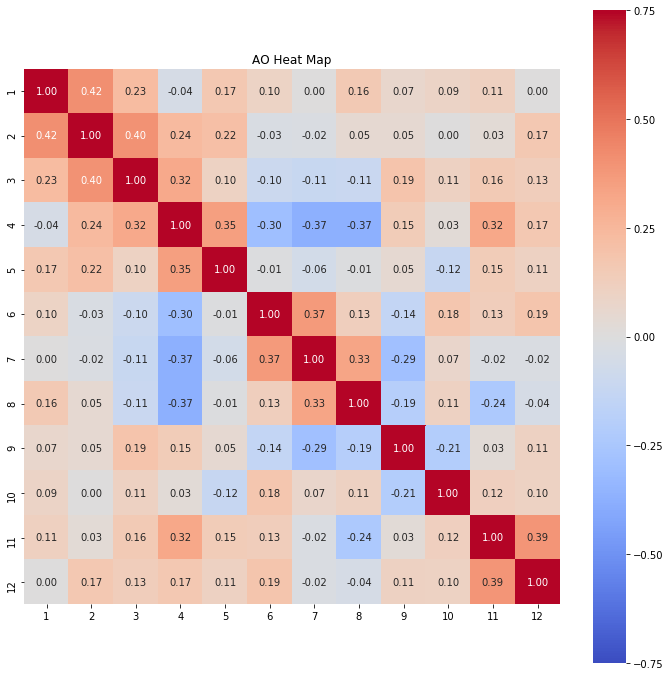

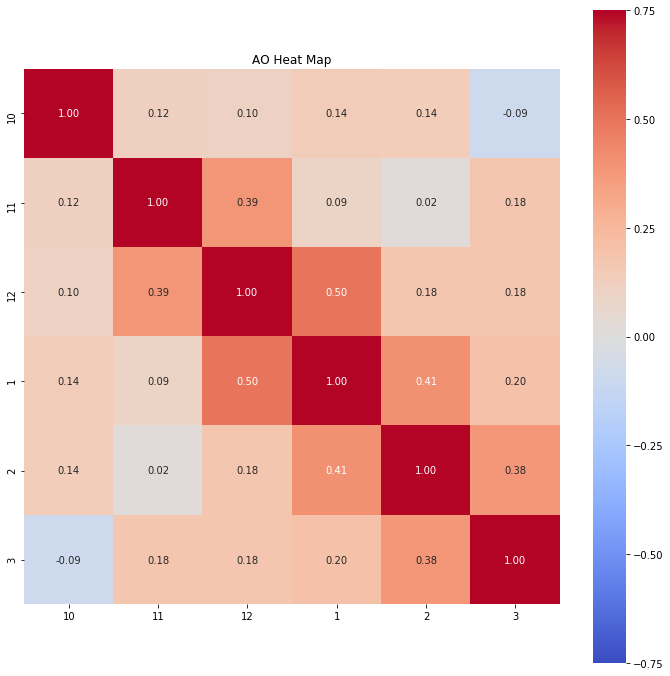

In [51]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_Matrix_AO.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax, annot=True)


midpoint =0
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm",annot=True, 
            center=midpoint, vmin=-.75, vmax=.75,fmt=".2f",square=True) 

plt.title('AO Heat Map')

#######################

f, ax = plt.subplots(figsize=(12, 12))
corr = df_Matrix_AO_Winter.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax, annot=True)


midpoint =0
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm",annot=True, 
            center=midpoint, vmin=-.75, vmax=.75,fmt=".2f",square=True) 

plt.title('AO Heat Map')

Text(0.5,1,'Eurasia Snow Heat Map')

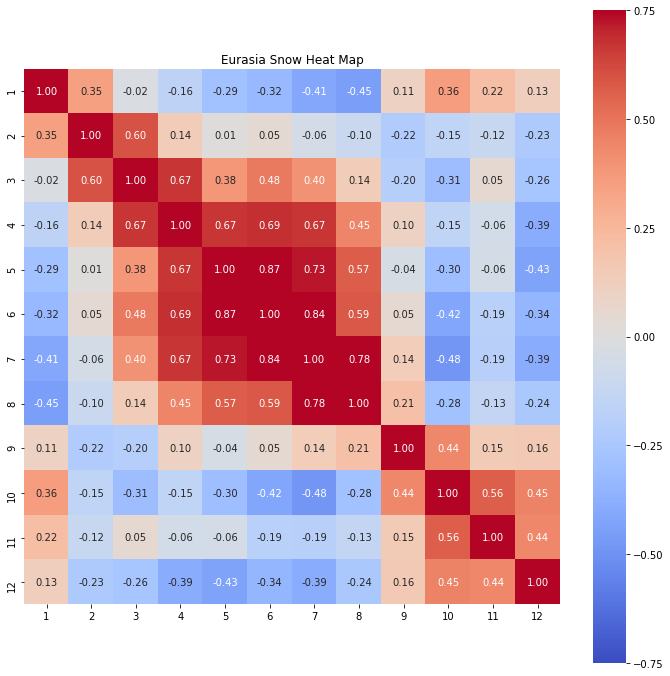

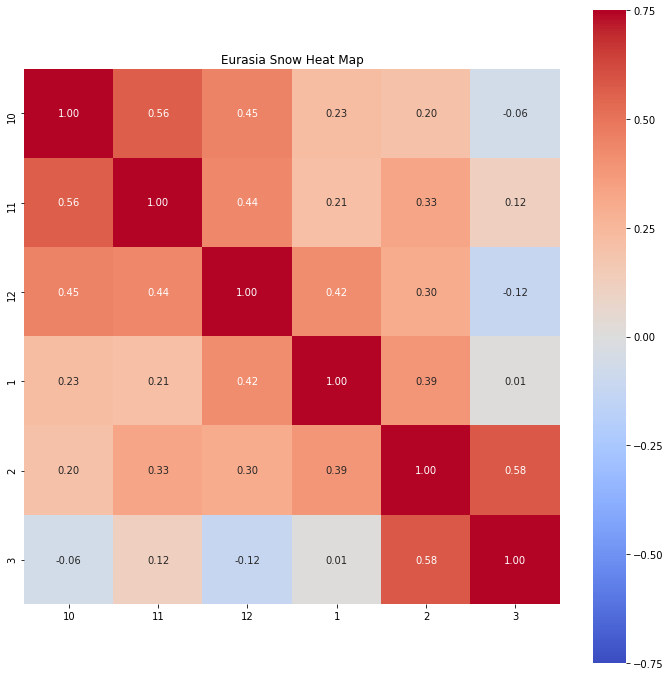

In [15]:
# Eurasia Snow

f, ax = plt.subplots(figsize=(12, 12))
corr = df_Matrix_EuSnow.corr()

midpoint =0
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm",annot=True, 
            center=midpoint, vmin=-.75, vmax=.75,fmt=".2f",square=True) 

plt.title('Eurasia Snow Heat Map')


f, ax = plt.subplots(figsize=(12, 12))
corr = df_Matrix_EuSnow_Winter.corr()

midpoint =0
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm",annot=True, 
            center=midpoint, vmin=-.75, vmax=.75,fmt=".2f",square=True) 

plt.title('Eurasia Snow Heat Map')


Text(0.5,1,'NA Snow Heat Map')

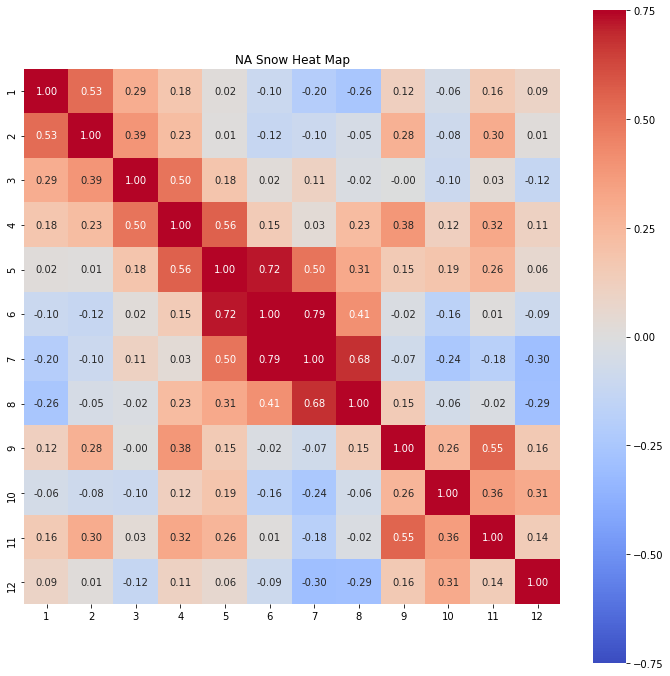

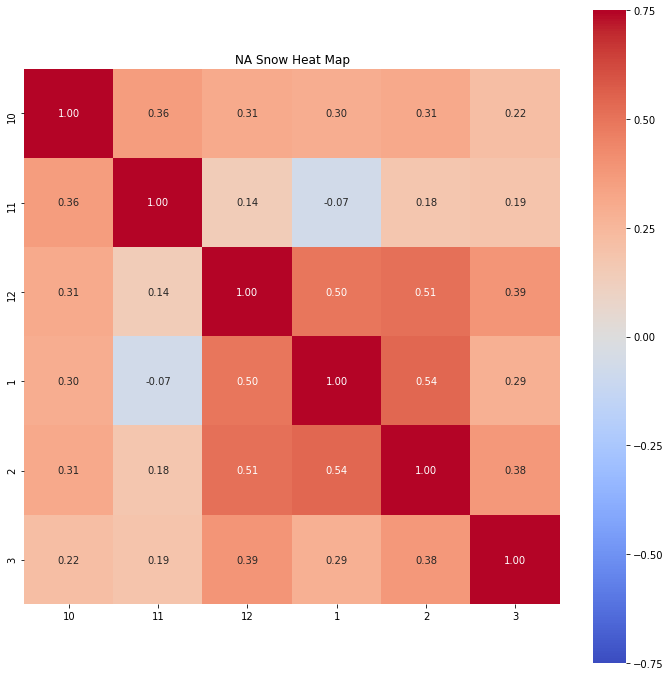

In [16]:
# NA Snow

f, ax = plt.subplots(figsize=(12, 12))
corr = df_Matrix_NASnow.corr()

midpoint =0
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm",annot=True, 
            center=midpoint, vmin=-.75, vmax=.75,fmt=".2f",square=True) 

plt.title('NA Snow Heat Map')


f, ax = plt.subplots(figsize=(12, 12))
corr = df_Matrix_NASnow_Winter.corr()

midpoint =0
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm",annot=True, 
            center=midpoint, vmin=-.75, vmax=.75,fmt=".2f",square=True) 

plt.title('NA Snow Heat Map')


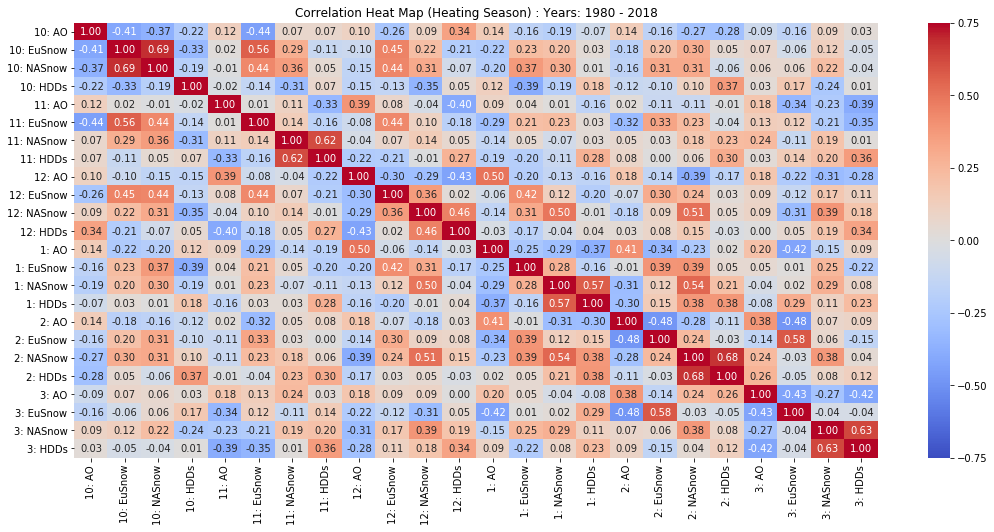

In [72]:
#f, ax = plt.subplots(figsize=(24, 12))
#corr = df_Matrix_All.corr()

#midpoint =0
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm",annot=True, 
#            center=midpoint, vmin=-.75, vmax=.75,fmt=".2f",square=True) 

#plt.title('All Snow Heat Map')



fig, ax = plt.subplots(figsize=(50, 12))
corr = df_Matrix_All_Winter.corr()

midpoint =0
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm",annot=True, 
            center=midpoint, vmin=-.75, vmax=.75,fmt=".2f",square=False) 

#plt.rcParams["figure.figsize"] = [16,9]
fig.set_figheight(8)
fig.set_figwidth(18)
plt.xticks(rotation=90) #fig.autofmt_xdate(rotation=90, ha='center')

title_hold= 'Correlation Heat Map (Heating Season) : Years: ' + str(year_start) + ' - ' + str(year_end-1)
plt.title(title_hold)
plt.savefig('/Users/davidmargolin/Desktop/Python/Images/Matrix/HeatMapAllWinter.png', dpi=100)

# with Mask

Text(0.5,1,'AO Heat Map')

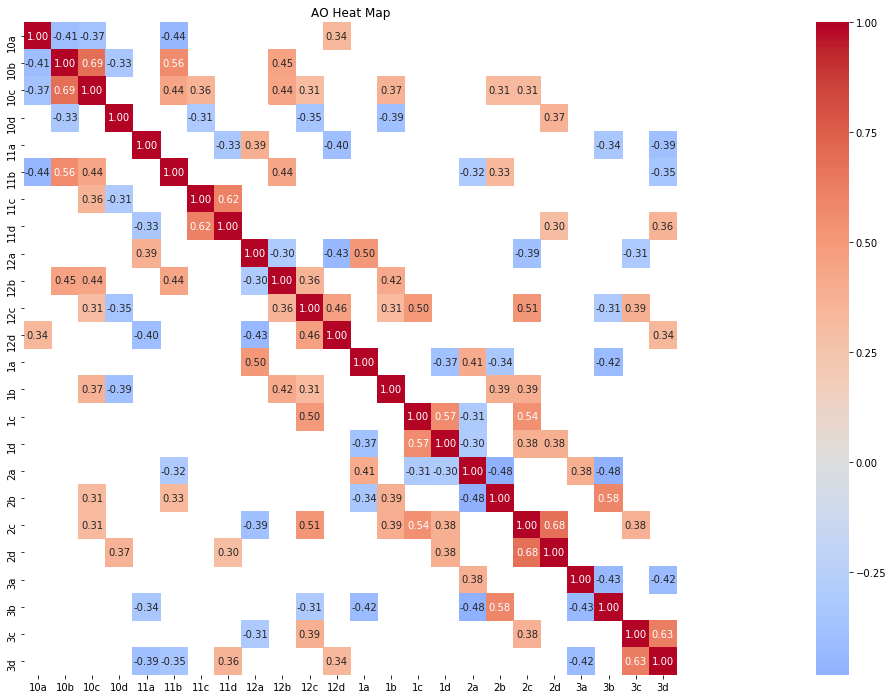

In [18]:
f, ax = plt.subplots(figsize=(50, 12))
mask = np.zeros(corr.shape)
#mask[1::2,1::2] = 1
mask[abs(corr)<.30] = 1
p = sns.heatmap(corr,
                cmap='coolwarm',
                annot=True,
                fmt=".2f",
                annot_kws={'size':10},
                cbar=True,
                center=midpoint,
                square=True,
                xticklabels=True,
                yticklabels=True,
                mask=mask)

#plt.text(5,12.3, "Heat Map", fontsize = 95, color='Black', fontstyle='italic')
plt.title('AO Heat Map')
#p.get_figure().savefig('../../figures/heatmap.png')

# Misc

In [40]:
#corr = df_Matrix.corr()
#corr.style.background_gradient()
#corr.style.background_gradient().set_properties(**{'font-size': '0pt'})
#corr.style.background_gradient().set_precision(2)
#df_Matrix.style.format("{:.2f}")


# Calculations

In [ ]:
Index, data=Blocking() #MaxTemps,MinTemps, Dates =Station.Station_Temps_def()

#############
# Parameters

#times = pd.date_range('1970-01-01', '2018-08-31', name='time') # Hard Coded
#data['Year']=pd.DatetimeIndex(data['Date']).year
#data['Value'].iloc[19475:19480]

Rolling_Index_Annual=365    #12 = 12 month rolling average 
Rolling_Index_Seasonal=91    #12 = 12 month rolling average 
#Shift_Index=30       

MinCriteria_MaxTemp=30  #30,20,95,75 (good proxy)
MinCriteria_MinTemp=20

MaxCriteria_MaxTemp=95
MaxCriteria_MinTemp=75

Start_Year=data['Year'][1]
Start_Date='1950-01-01'
End_Year=data['Year'][len(data)-1]
End_Date='2018-09-30'

print('Index: ' + Index)
print()
print('Rolling Index_Annual = ' + str(Rolling_Index_Annual) + ' Days')
print('Rolling Index_Seasonal = ' + str(Rolling_Index_Seasonal) + ' Days')
#print('Shift Index = ' + str(Shift_Index) + ' Days')
print()
print('Start Year = ' + str(Start_Year))
print('End Year = ' + str(End_Year))
print("")


# Calculate Rolling Mean  *** Backward Looking ****
data['RM_Annual'] = round(data.Value.rolling(Rolling_Index_Annual).mean(),1)
data['RM_Seasonal'] = round(data.Value.rolling(Rolling_Index_Seasonal).mean(),1)
data=data.drop(np.arange(Rolling_Index_Annual))
#data['RM_Offset']= round(data.Anom.rolling(Rolling_Index).mean().shift(Shift_Index),1)
#data=data.drop(np.arange(60))
#data['RM_Delta']=round(data['RM']-data['RM_Offset'],1)


# Plot the Mean - Annual and Seasonal

In [ ]:
#fig, ax = plt.subplots(1,0,figsize=(12,6), dpi=90) 
#plt.plot(data.RM_Annual)
#plt.title('AO Annual - 1 Yr Rolling Mean - All Years')


#data[(data.RM <= Min_Criteria) & (data.Year == rows)].count().values[1]
#plt.plot(data['Value'])

#sns.lmplot(x='Year',y='RM_Annual',data=data)
#plt.title('AO - 1 Yr Rollin Mean - All Years')

# Scratch

In [ ]:

#ax=sns.lmplot(x='Year',y='All',data=data2)
#plt.title('AO Extreme Events: All Events')


#fig, ax = plt.subplots(1,0,figsize=(12,6), dpi=90) 
#plt.plot(data.RM_Seasonal[(data.Month==8) & (data.Day==31)])
#plt.title('AO Summer - 90 Day Rolling Mean - All Years')


#fig, ax = plt.subplots(1,0,figsize=(20,12), dpi=150)


#sns.pairplot(data=data2[data2.Month==1])
#sns.pairplot(data=data2[data2.Year==2015])


#sns.swarmplot(x='LGA_Max', y='ORD_Max', data=data,hue='Month_LGA')
#sns.swarmplot(x='LGA_Max', y='ORD_Max', data=data)

#sns.stripplot(y='LGA_Max', data=data,jitter=True, size=3, hue='Month')

#sns.violinplot(y='Max_Temp',data=data_LGA)

#sns.lmplot(x='Year',y='Max',data=data2)
#sns.jointplot(x='Year',y='Max',data=data2, kind='hex')
#sns.jointplot(x='Year',y='Max',data=data2, kind='scatter')

#fig, ax = plt.subplots(1,0,figsize=(12,6), dpi=90) 
#ax=sns.regplot(x='Year',y='RM_Delta',data=data,scatter=True)
#ax=sns.regplot(x=str('Year'),y='MaxMaxMA',data=df,scatter=False, truncate=True)
#sns.regplot(x='LGA_Max',y='ORD_Max',data=data, scatter=False, ci=95, robust=True, color=red)

#fig, ax = plt.subplots(1,0,figsize=(12,6), dpi=90) 
#plt.plot(count_RM_Delta_Min)

#fig, ax = plt.subplots(1,0,figsize=(12,6), dpi=90) 
#plt.plot(count_RM_Delta_Max)
#plt.show()
